In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)
from glob import glob

In [2]:
!ls /net/kage/d5/datasets

20CRv2	     CRU3.25	 GHCN-D   ICOADS      NARR07	     ORAs4
20CRv2-2008  ERA-1deg	 GPCC	  index.tex   NCEP-NCAR      PO-DACC
20CRv2c      ERA20C	 GPCP	  index.tex~  noaa.oisst.v2  Sea-Ice
basins	     ERA40	 HadEX2   LENS	      NOAA-SST
COBE-SST2    ERAInterim  HadISST  MERRA       NOCS_v2
CRU3.10      ERSST	 HadSLP   NARR	      OAFlux


In [4]:
path = '/net/kage/d5/datasets/ERAInterim/monthly/'
dirs = glob(path+'/*')
dirs

['/net/kage/d5/datasets/ERAInterim/monthly/Accum',
 '/net/kage/d5/datasets/ERAInterim/monthly/Surface',
 '/net/kage/d5/datasets/ERAInterim/monthly/index.tex',
 '/net/kage/d5/datasets/ERAInterim/monthly/VertInt',
 '/net/kage/d5/datasets/ERAInterim/monthly/PressureLevels']

In [5]:
ddict = {'Surface':path+'Surface/*.nc','VertInt':path+'VertInt/*.nc','Accum':path+'Accum/*.nc','PressureLevels':path+'PressureLevels/*.nc'}
for key, value in ddict.items():
    print(key,value)

Surface /net/kage/d5/datasets/ERAInterim/monthly/Surface/*.nc
VertInt /net/kage/d5/datasets/ERAInterim/monthly/VertInt/*.nc
Accum /net/kage/d5/datasets/ERAInterim/monthly/Accum/*.nc
PressureLevels /net/kage/d5/datasets/ERAInterim/monthly/PressureLevels/*.nc


In [6]:
dtype = 'Accum'
ds = xr.open_mfdataset(glob(ddict[dtype]),decode_times=False)
names = list(ds.data_vars.variables)

In [7]:
for var in sorted(names):
    print(var+':\t',ds[var].long_name)

bld:	 Boundary layer dissipation
cp:	 Convective precipitation
csf:	 Convective snowfall
es:	 Snow evaporation
evap:	 Evaporation
ewss:	 Eastward turbulent surface stress
gwd:	 Gravity wave dissipation
lgws:	 Eastward gravity wave surface stress
lsf:	 Large-scale snowfall
lsp:	 Large-scale precipitation
lspf:	 Large-scale precipitation fraction
magss:	 Magnitude of turbulent surface stress
mgws:	 Northward gravity wave surface stress
nsss:	 Northward turbulent surface stress
par:	 Photosynthetically active radiation at the surface
parcs:	 Clear sky surface photosynthetically active radiation
ro:	 Runoff
sf:	 Snowfall
slhf:	 Surface latent heat flux
smlt:	 Snowmelt
sshf:	 Surface sensible heat flux
ssr:	 Surface net solar radiation
ssrc:	 Surface net solar radiation, clear sky
ssrd:	 Surface solar radiation downwards
str:	 Surface net thermal radiation
strc:	 Surface net thermal radiation, clear sky
strd:	 Surface thermal radiation downwards
sund:	 Sunshine duration
tisr:	 TOA incident 

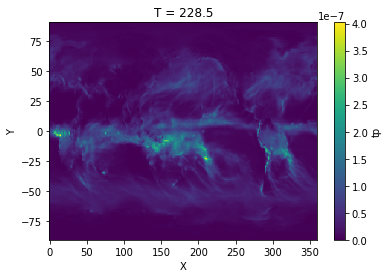

In [8]:
ds.tp[0,:,:].plot()

In [9]:
def enso2date(enso,leap=False):
    norm = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    iy = 1960 + int(enso/12)
    if enso < 0:
        iy = iy - 1
    res = enso - (iy - 1960)*12
    im = int(res) + 1
    if im == 13:
        im = 1
        iy = iy + 1
    if leap & (im == 2) &  (iy % 4 == 0 ):   
        id = 1 + int(29 * (res - int(res)))
    else:
        id = 1 + int(norm[im-1] * (res - int(res)))
    return str(im)+'/'+str(id)+'/'+str(iy)

In [10]:
# how to automatically fix time grid:
#ds['time'] = pd.date_range('1/1/1958', periods=ds.anom.shape[0], freq='MS').shift(15, freq='D')
enso = ds.tp['T'].values[0] - .5
datetime = enso2date(enso); datetime

'1/1/1979'

In [11]:
pd.date_range(datetime, periods=ds['T'].shape[0], freq='MS').shift(15, freq='D')

DatetimeIndex(['1979-01-16', '1979-02-16', '1979-03-16', '1979-04-16',
               '1979-05-16', '1979-06-16', '1979-07-16', '1979-08-16',
               '1979-09-16', '1979-10-16',
               ...
               '2016-03-16', '2016-04-16', '2016-05-16', '2016-06-16',
               '2016-07-16', '2016-08-16', '2016-09-16', '2016-10-16',
               '2016-11-16', '2016-12-16'],
              dtype='datetime64[ns]', length=456, freq=None)

In [12]:
ds['T'] = pd.date_range(datetime, periods=ds['T'].shape[0], freq='MS').shift(15, freq='D')
dsnew = ds.rename({'T':'time'})

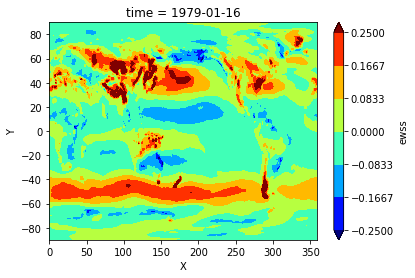

In [13]:
dsnew.ewss[0].plot.contourf(vmin=-0.25,vmax=0.25,cmap='jet')

In [15]:
dtype = 'PressureLevels'
ds = xr.open_mfdataset(glob(ddict[dtype]),decode_times=False)
names = list(ds.data_vars.variables)
print(ds['T'])
names

<xarray.DataArray 'T' (T: 456)>
array([   0.5,    1.5,    2.5, ...,  453.5,  454.5,  455.5], dtype=float32)
Coordinates:
  * T        (T) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
Attributes:
    calendar:    360
    pointwidth:  1.0
    gridtype:    0
    units:       months since 1979-01-01


['q', 'u', 'v', 'r', 'w', 't']